# Lead Scoring Case Study


## Problem Statement:

An education company named X Education sells online courses to industry professionals. Profession who is in search of higher education , upskilling and transitioning into different Career path lands in the websites and search for the relevant courses.

Company advertise its courses on several websites and search engine and from this marketing strategy, a lot of leads generated in the initial stage but only a few of them come out as paying customers. To optimize the work of sales and get maximum out of the hot leads without losing them.
Company is trying to create strategic focused approach which will help to identify Hot leads. Company wants to saves Sales team effort and direct them to actual leads that are higher chances of conversion. Identified leads will be educated by Sales team in order to maximize Lead conversion rate.

The CEO, has given the Target of 80 % lead conversion Rate.
In technical terms, Analyst has to achieve 80 % recall through its analysis by identifying correct leads which needs to be focused.

Objective

1. Create a predictive Model to identify Hot leads.
2. Insights from given history Data and make recommendation for improvement.
3. Identify key areas to focus and improvised them.


## Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_rows = 100


## Step 1. Data Exploration & Cleaning


In [2]:
#Reading data
data_df=pd.read_csv("Leads.csv")


### 1A. Basic Analysis to understand Data set


In [3]:
data_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data_df.shape


(9240, 37)

In [5]:
data_df.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
print(data_df.info()) # # print dataset information: shows column names, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data_df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Standardize column names: Convert to lowercase, replace spaces/hyphens with underscores
data_df.columns = [col.lower().strip().replace(" ", "_").replace("-", "_") for col in data_df.columns]


In [9]:
# Manual renaming of specific columns for clarity
rename_mapping = {
    'totalvisits': 'total_visits',
    'total_time_spent_on_website': 'time_on_website',
    'how_did_you_hear_about_x_education': 'source',
    'what_is_your_current_occupation': 'occupation',
    'what_matters_most_to_you_in_choosing_a_course': 'course_selection_reason',
    'receive_more_updates_about_our_courses': 'courses_updates',
    'update_me_on_supply_chain_content': 'supply_chain_content_updates',
    'get_updates_on_dm_content': 'dm_content_updates',
    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
    'a_free_copy_of_mastering_the_interview': 'mastering_interview'
}


In [10]:
# Apply renaming
data_df.rename(columns=rename_mapping, inplace=True)


In [11]:
# Display first row to verify changes
data_df.head(1)


,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [12]:
# verify the column names
data_df.columns


Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity', 'country',
       'specialization', 'source', 'occupation', 'course_selection_reason',
       'search', 'magazine', 'newspaper_article', 'x_education_forums',
       'newspaper', 'digital_advertisement', 'through_recommendations',
       'courses_updates', 'tags', 'lead_quality',
       'supply_chain_content_updates', 'dm_content_updates', 'lead_profile',
       'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score',
       'cheque_payment', 'mastering_interview', 'last_notable_activity'],
      dtype='object')

In [13]:
# Drop the 'prospect_id and lead_number' column as it's an identifier and not useful for modeling hence dropping the same
data_df.drop(['prospect_id'], axis=1, inplace=True)
# Verify if the column is removed
print("prospect_id" in data_df.columns)




False


In [14]:
# Drop the 'prospect_id and lead_number' column as it's an identifier and not useful for modeling hence dropping the same
data_df.drop(['lead_number'], axis=1, inplace=True)
# Verify if the column is removed
print("lead_number" in data_df.columns)




False


In [15]:
data_df.columns


Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'converted', 'total_visits', 'time_on_website', 'page_views_per_visit',
       'last_activity', 'country', 'specialization', 'source', 'occupation',
       'course_selection_reason', 'search', 'magazine', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'courses_updates', 'tags', 'lead_quality',
       'supply_chain_content_updates', 'dm_content_updates', 'lead_profile',
       'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score',
       'cheque_payment', 'mastering_interview', 'last_notable_activity'],
      dtype='object')

### 1B. Identify Columns That Contain the Word "Select"


In [16]:


def find_columns_with_select(data_df):
    """
    Identifies columns that contain the word 'Select' in a categorical dataset.

    Parameters:
    - data_df (pd.DataFrame): The input DataFrame.

    Returns:
    - List: A list of column names that contain the value 'Select'.
    """
    # Select all non-numeric (categorical) columns
    df_obj = data_df.select_dtypes(include='object')

    # Find columns that contain the word "Select"
    contains_select = lambda x: x.str.contains('Select', na=False)
    columns_with_select = df_obj.columns[df_obj.apply(contains_select).any()].tolist()

    return columns_with_select



In [17]:

def count_select_occurrences(data_df, columns_with_select):
    """
    Counts occurrences of the word 'Select' in the identified columns.

    Parameters:
    - data_df (pd.DataFrame): The input DataFrame.
    - columns_with_select (list): List of columns containing 'Select'.

    Returns:
    - pd.Series: A Series with the count of 'Select' occurrences in each column.
    """
    return data_df[columns_with_select].apply(lambda x: (x == 'Select').sum())




In [18]:
def replace_select_with_nan(data_df, columns_with_select):
    """
    Replaces 'Select' values with NaN in the identified columns.

    Parameters:
    - data_df (pd.DataFrame): The input DataFrame.
    - columns_with_select (list): List of columns containing 'Select'.

    Returns:
    - pd.DataFrame: The updated DataFrame with 'Select' replaced by NaN in the identified columns.
    """
    data_df[columns_with_select] = data_df[columns_with_select].replace("Select", np.nan)
    return data_df




In [19]:
def count_null_values(data_df, columns_with_select):
    """
    Counts the number of NaN values in the identified columns after replacement.

    Parameters:
    - data_df (pd.DataFrame): The input DataFrame.
    - columns_with_select (list): List of columns containing 'Select'.

    Returns:
    - pd.Series: A Series with the count of NaN values in each column.
    """
    return data_df[columns_with_select].isnull().sum()


In [20]:
# Step 1: Identify columns containing 'Select'
columns_with_select = find_columns_with_select(data_df)
print("Columns containing 'Select':", columns_with_select)




Columns containing 'Select': ['specialization', 'source', 'lead_profile', 'city']


In [21]:
# Step 2: Count occurrences of 'Select' before replacement
select_counts_before = count_select_occurrences(data_df, columns_with_select)
print("Occurrences of 'Select' before replacement:\n", select_counts_before)



Occurrences of 'Select' before replacement:
 specialization    1942
source            5043
lead_profile      4146
city              2249
dtype: int64


In [22]:
null_counts_before_replacement = count_null_values(data_df, columns_with_select)
print("Null values count Before replacing 'Select' with NaN:\n", null_counts_before_replacement)


Null values count Before replacing 'Select' with NaN:
 specialization    1438
source            2207
lead_profile      2709
city              1420
dtype: int64


In [23]:
# Step 3: Replace 'Select' with NaN
data_df = replace_select_with_nan(data_df, columns_with_select)


In [24]:
# Count NaN values after replacement
null_counts_after = count_null_values(data_df, columns_with_select)
print("Null values count after replacing 'Select' with NaN:\n", null_counts_after)


Null values count after replacing 'Select' with NaN:
 specialization    3380
source            7250
lead_profile      6855
city              3669
dtype: int64


- The total null values after replacing "Select" with NaN is equal to the sum of the occurrences of the word "Select" before replacement and the null values in those columns prior to replacement.


In [25]:
import pandas as pd

def get_unique_counts_and_percentage(df):
    """
    Generate a DataFrame summarizing the unique value counts, their percentage,
    count of null values, and percentage of nulls for each column,
    and print it in a tabular format.
    """
    summary = pd.DataFrame({
        'Column Name': df.columns,
        'Unique Count': df.nunique().values,
        'Total Count': len(df),
        'Unique Percentage': (df.nunique() / len(df) * 100).values,
        'Null Count': df.isnull().sum().values,
        'Null Percentage': (df.isnull().sum() / len(df) * 100).values
    })

    # Print the DataFrame in a tabular format using Pandas
    #print(summary.to_string(index=False))

    return summary.to_string(index=False)



In [26]:
df_summary = get_unique_counts_and_percentage(data_df)
print(df_summary)


                 Column Name  Unique Count  Total Count  Unique Percentage  Null Count  Null Percentage
                 lead_origin             5         9240           0.054113           0         0.000000
                 lead_source            21         9240           0.227273          36         0.389610
                do_not_email             2         9240           0.021645           0         0.000000
                 do_not_call             2         9240           0.021645           0         0.000000
                   converted             2         9240           0.021645           0         0.000000
                total_visits            41         9240           0.443723         137         1.482684
             time_on_website          1731         9240          18.733766           0         0.000000
        page_views_per_visit           114         9240           1.233766         137         1.482684
               last_activity            17         9240         

### 1C. Removing Highly Skewed data


In [27]:
cols_to_drop = []
for col in  data_df.columns :
  value_counts = data_df[col].value_counts(normalize=True)*100
  if data_df[col].nunique() == 1 or value_counts.iloc[0] > 90:
    cols_to_drop.append(col)
    data_df.drop(col, axis=1, inplace=True)

print(cols_to_drop)


['do_not_email', 'do_not_call', 'country', 'course_selection_reason', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'courses_updates', 'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']


### 1D. Handling missing values or null values

- Step 1 : % of missing values¶
- Step 2 : if % >40 then drop column.
- Step 3 : if %<40 of missing values then impute


In [28]:
cut_off=40
cols_to_drop_null = list(data_df.columns[100*data_df.isnull().mean()>cut_off])
print(cols_to_drop_null)


['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score']


In [29]:
# dropping columns with no feature
lead_df =data_df.drop(cols_to_drop_null,axis=1)


In [30]:
lead_df.shape


(9240, 13)

In [31]:
df_summary = get_unique_counts_and_percentage(lead_df)
print(df_summary)


          Column Name  Unique Count  Total Count  Unique Percentage  Null Count  Null Percentage
          lead_origin             5         9240           0.054113           0         0.000000
          lead_source            21         9240           0.227273          36         0.389610
            converted             2         9240           0.021645           0         0.000000
         total_visits            41         9240           0.443723         137         1.482684
      time_on_website          1731         9240          18.733766           0         0.000000
 page_views_per_visit           114         9240           1.233766         137         1.482684
        last_activity            17         9240           0.183983         103         1.114719
       specialization            18         9240           0.194805        3380        36.580087
           occupation             6         9240           0.064935        2690        29.112554
                 tags         

In [32]:
cat_cols=[]
num_cols=[]
for col in lead_df.columns:
    if lead_df[col].nunique()>30:
        num_cols.append(col)
    else:
        cat_cols.append(col)


In [33]:
lead_df[cat_cols].head()


,lead_origin,lead_source,converted,last_activity,specialization,occupation,tags,city,mastering_interview,last_notable_activity
0,API,Olark Chat,0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,API,Organic Search,0,Email Opened,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [34]:
lead_df[num_cols].head()


,total_visits,time_on_website,page_views_per_visit
0,0.0,0,0.0
1,5.0,674,2.5
2,2.0,1532,2.0
3,1.0,305,1.0
4,2.0,1428,1.0


In [35]:
for col in num_cols:
    med=lead_df[col].median()
    lead_df[col]= lead_df[col].fillna(med)
# We are replacing missing values with median in case of numerical columns
for col in cat_cols:
    mod = lead_df[col].mode()[0]
    lead_df[col] = lead_df[col].fillna(mod)
# We are replacing missing values with mode in case of categorical columns


In [36]:
lead_df.head()


,lead_origin,lead_source,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,city,mastering_interview,last_notable_activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [37]:
df_summary = get_unique_counts_and_percentage(lead_df)
print(df_summary)


          Column Name  Unique Count  Total Count  Unique Percentage  Null Count  Null Percentage
          lead_origin             5         9240           0.054113           0              0.0
          lead_source            21         9240           0.227273           0              0.0
            converted             2         9240           0.021645           0              0.0
         total_visits            41         9240           0.443723           0              0.0
      time_on_website          1731         9240          18.733766           0              0.0
 page_views_per_visit           114         9240           1.233766           0              0.0
        last_activity            17         9240           0.183983           0              0.0
       specialization            18         9240           0.194805           0              0.0
           occupation             6         9240           0.064935           0              0.0
                 tags         

In [38]:
lead_df.lead_source.value_counts()


lead_source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [39]:
lead_df['lead_source']=lead_df['lead_source'].replace(['google'],'Google')


In [40]:
lead_df[num_cols].describe()


,total_visits,time_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


### 1D. Handling outliers


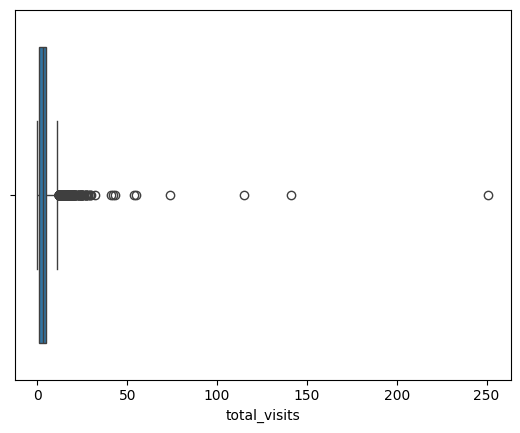

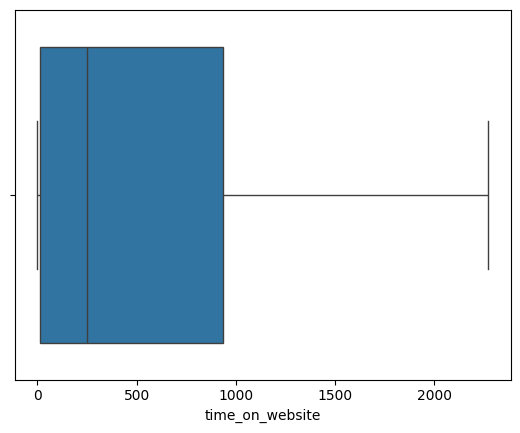

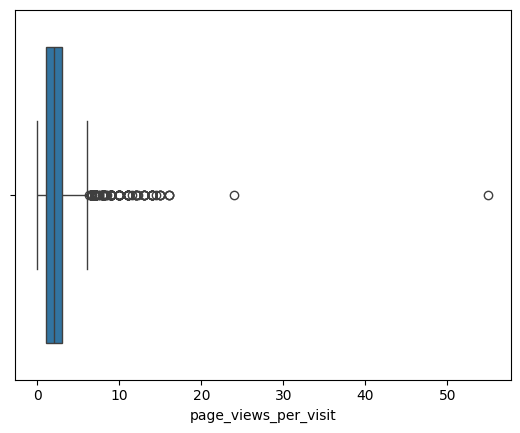

In [41]:
for col in num_cols:
    sns.boxplot(x=lead_df[col])
    plt.show()


In [42]:
for col in num_cols:
    Q1 = lead_df[col].describe()["25%"]
    Q3 = lead_df[col].describe()["75%"]
    IQR = Q3-Q1
    LW = Q1 - 1.5*IQR
    UW = Q3 + 1.5*IQR
    lead_df[col]=np.where(lead_df[col]>UW,UW,lead_df[col]) # capping
    lead_df[col]=np.where(lead_df[col]<LW,LW,lead_df[col]) # flooring
    if lead_df[col].max()>UW:
        print(col,"some issue")
    if lead_df[col].min()<LW:
        print(col,"some issue")


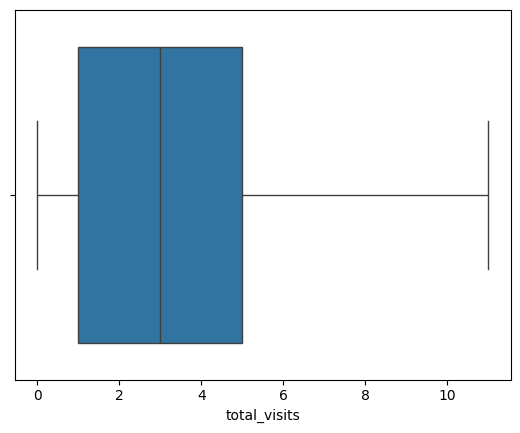

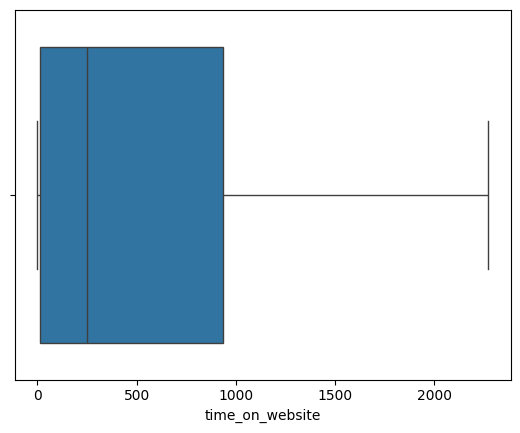

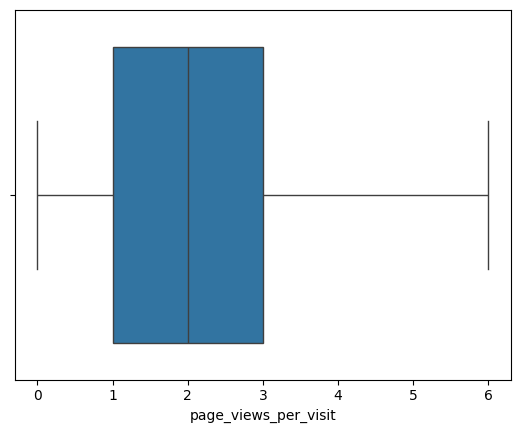

In [43]:
for col in num_cols:
    sns.boxplot(x=lead_df[col])
    plt.show()



## Step 2. Data analysis

- 2A. Univariate Analysis
- 2B. Bivariate Analysis
- 2C. Multivariate Analysis


### 2A. Univariate Analysis


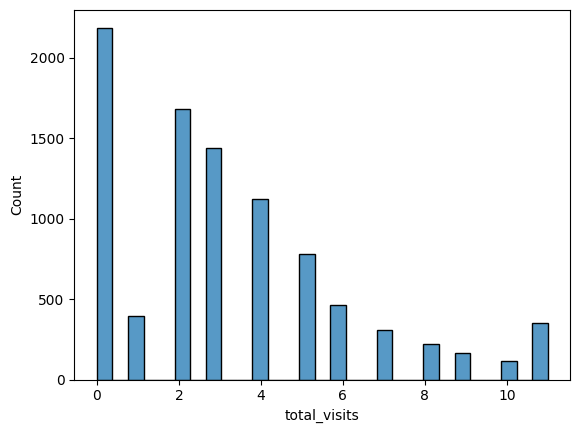

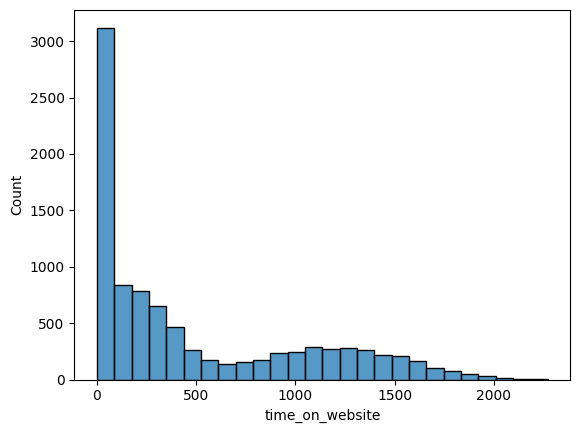

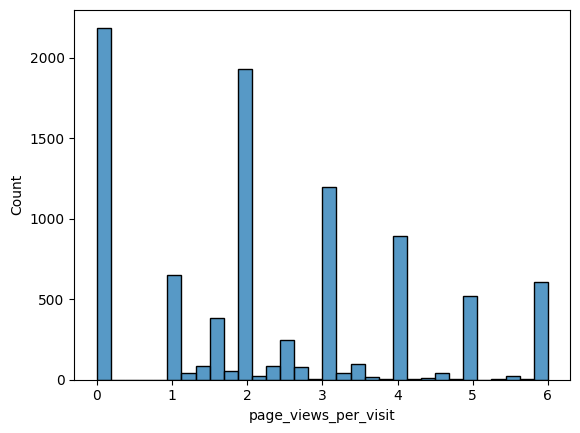

In [44]:
#histogram for numerical column
for col in num_cols:
    sns.histplot(x=lead_df[col])
    plt.show()
    #scatter plot for numerical columns


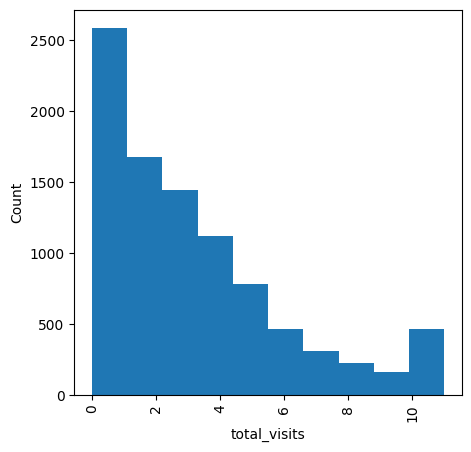

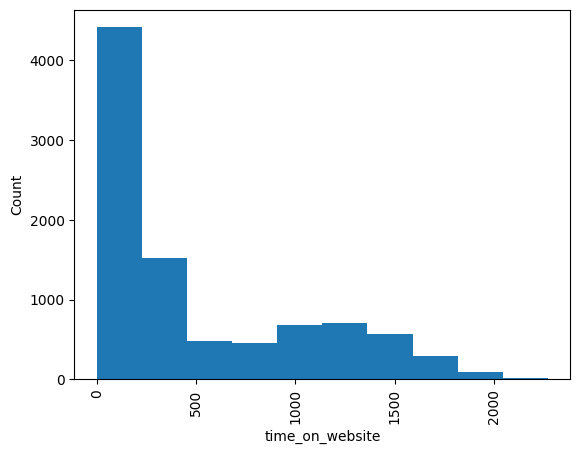

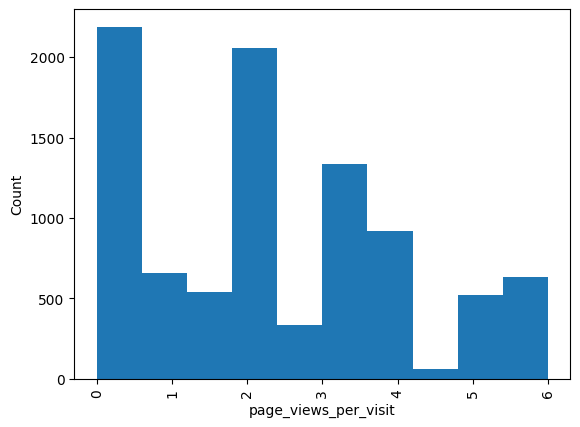

In [45]:
plt.figure(figsize=(5,5))
for col in num_cols:
    plt.hist(lead_df[col], bins = 10)
    plt.xticks(rotation =90)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


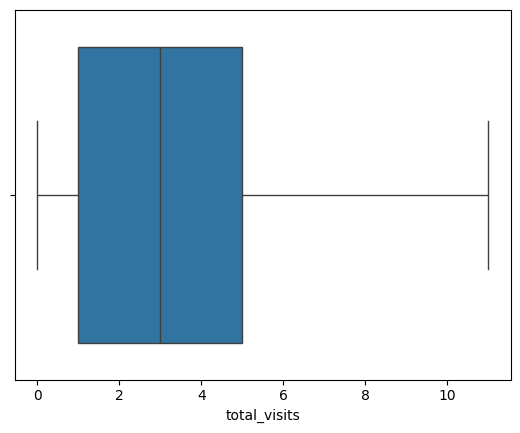

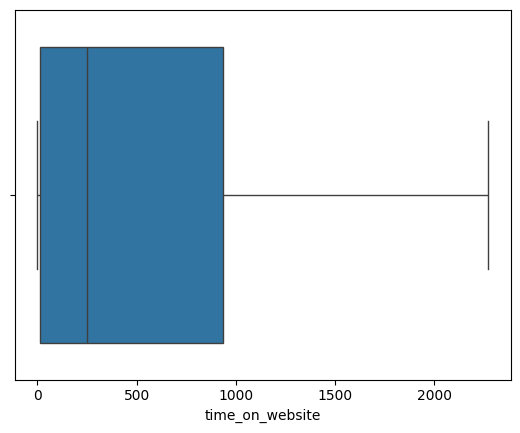

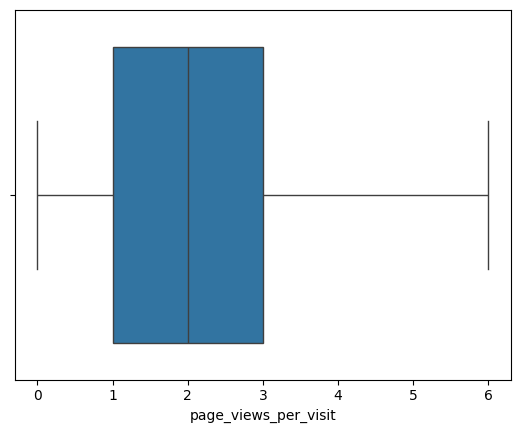

In [46]:
for col in num_cols:
    sns.boxplot(x=lead_df[col])
    plt.show()


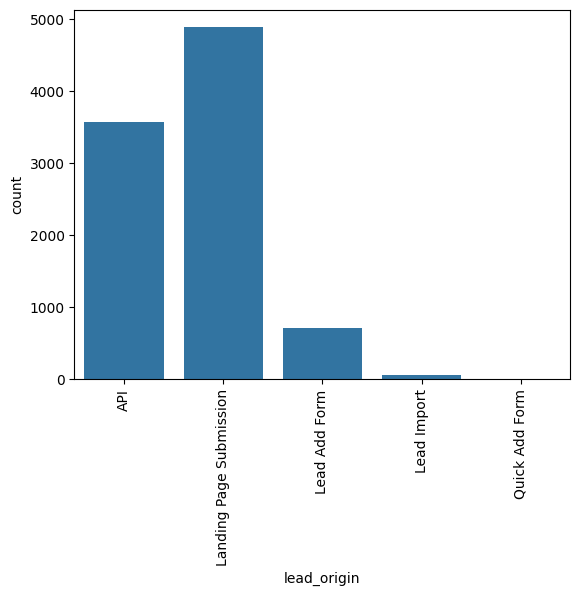

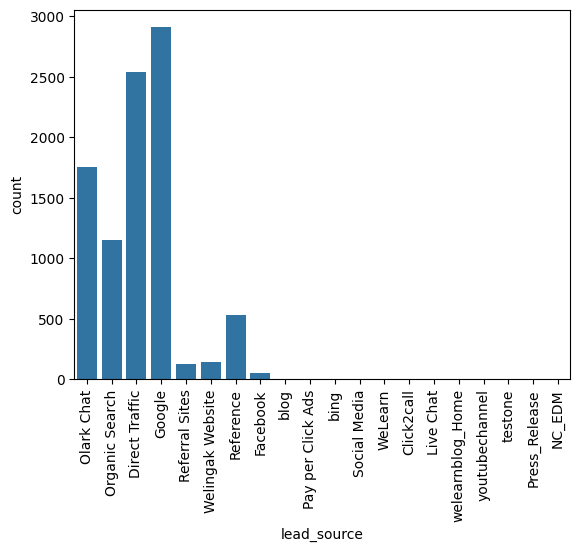

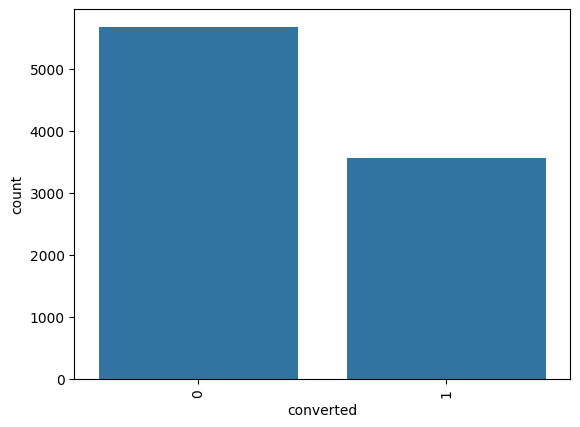

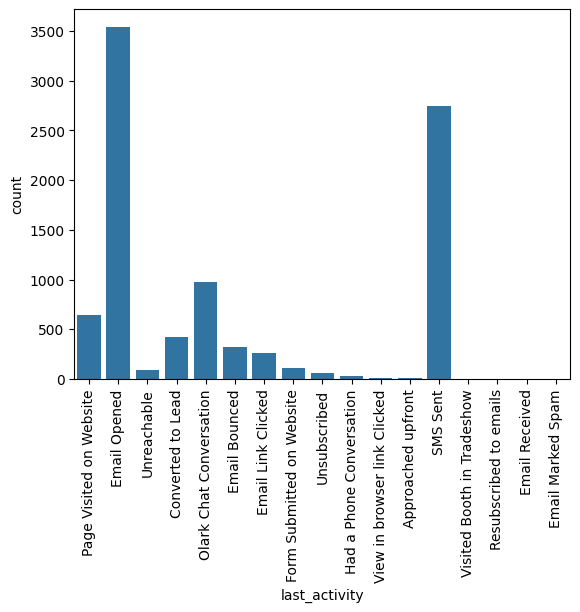

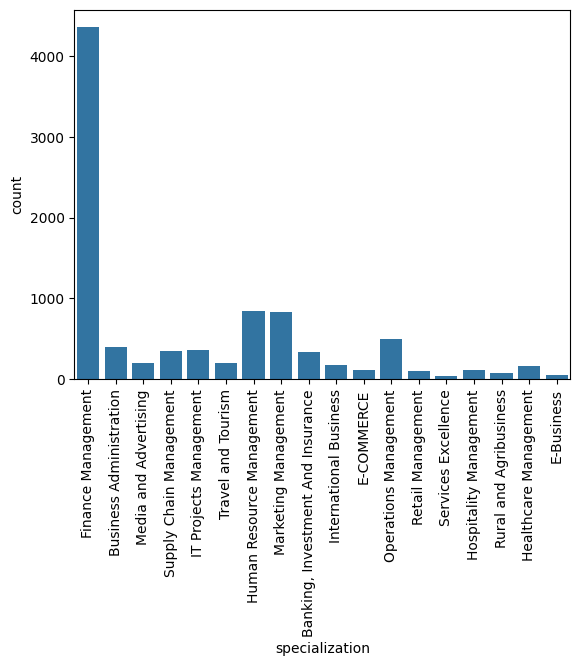

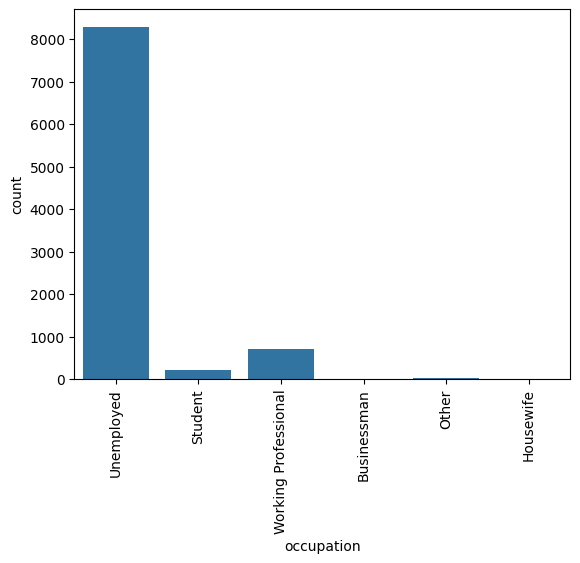

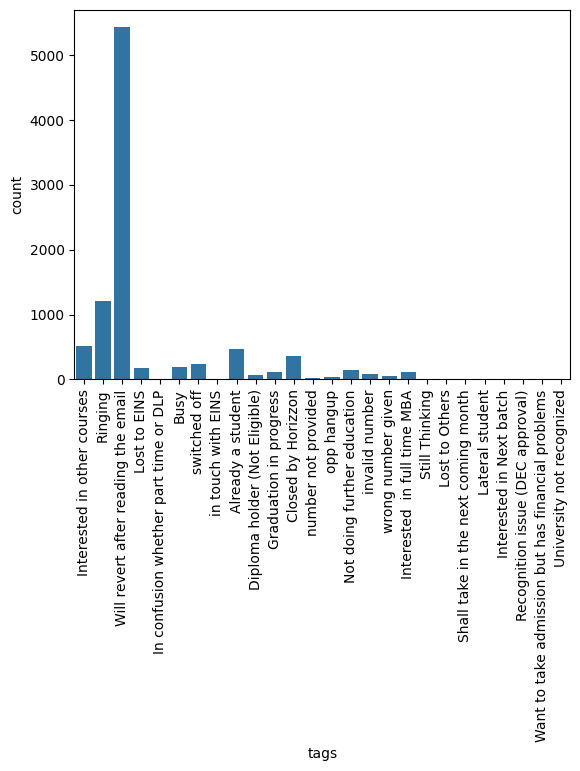

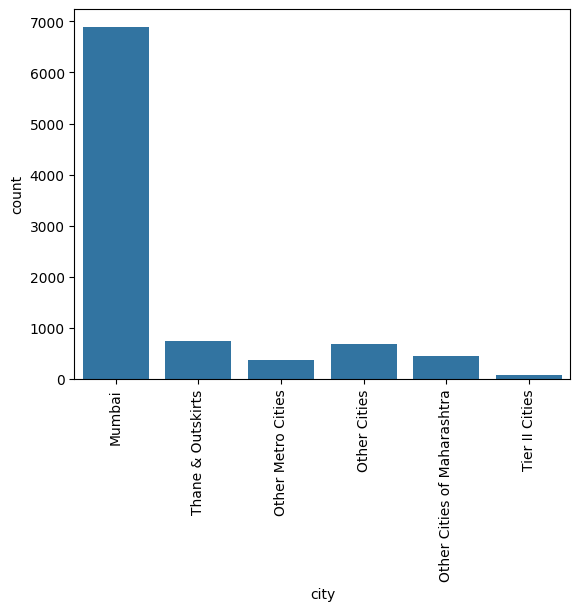

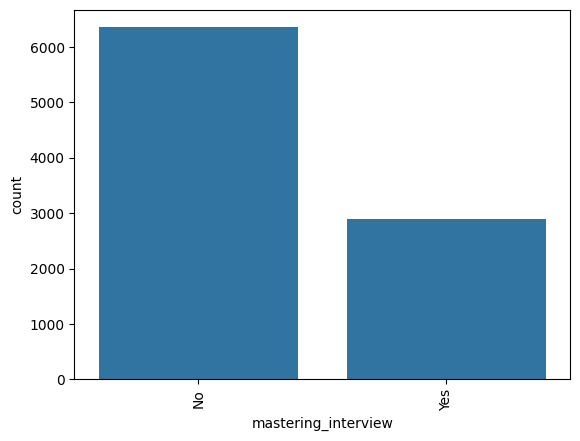

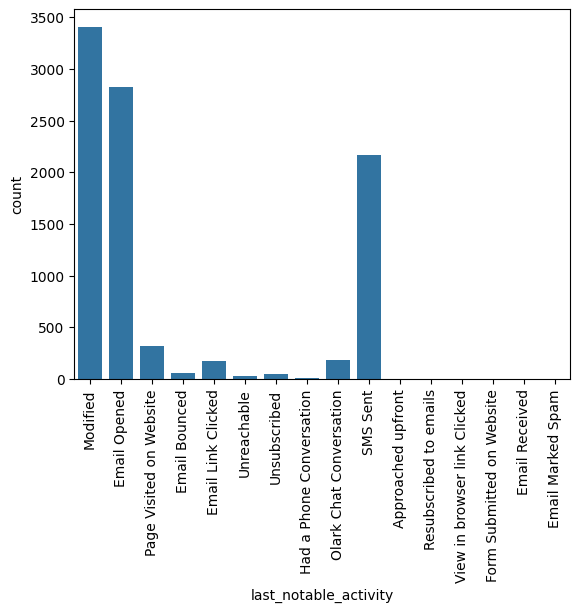

In [47]:
#count plot for categorical column
for col in cat_cols:
    sns.countplot(x=lead_df[col])
    plt.xticks(rotation =90)
    plt.show()


#### Insights

1. Most of the Leads are origin from API and Landing Page Submission.
2. Source of the maximum Leads are Olark Chat, Organix Search. Direct Trafffic , google
3. Most of the lead preferred not to call and email
4. less then 40 % leads are converted into customer
5. Most of the customers worked in finance management before or unemployed
6. Most of the customers are from Mumbai.
7. Most of the customers current status is they will revert after reading the email


### 2B. Bivariate Analysis


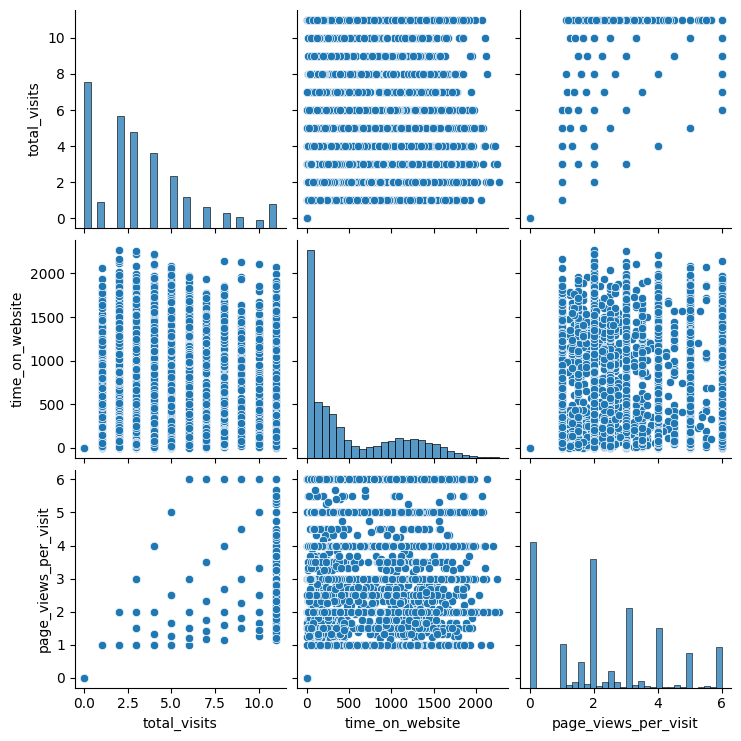

In [48]:
# pairplot for numerical columns
sns.pairplot(lead_df[num_cols])
plt.show()


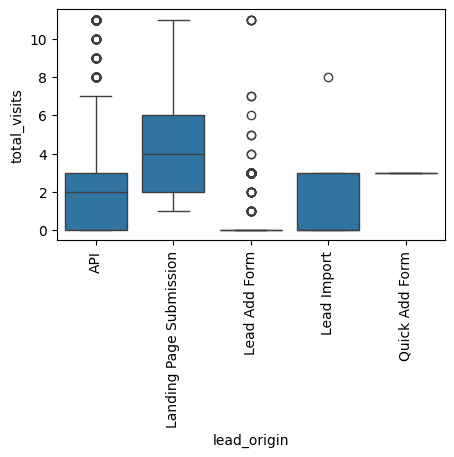

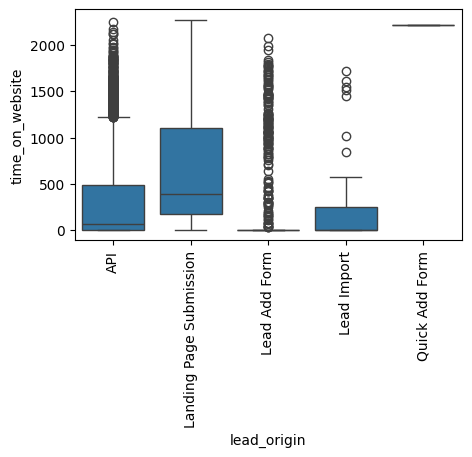

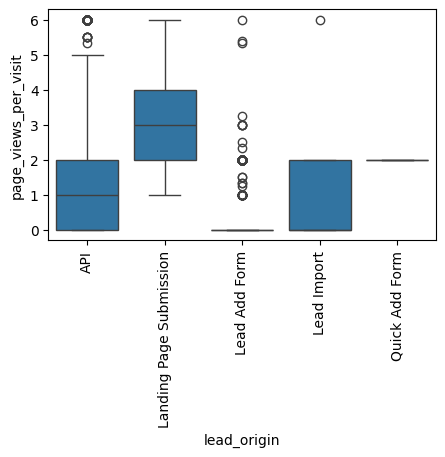

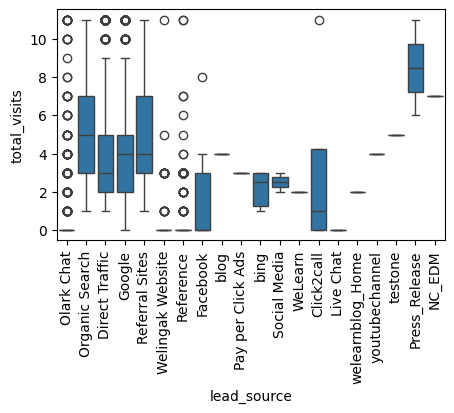

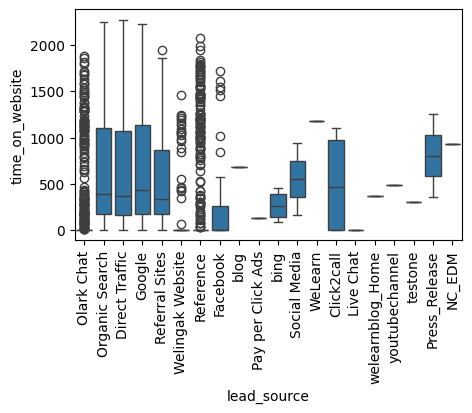

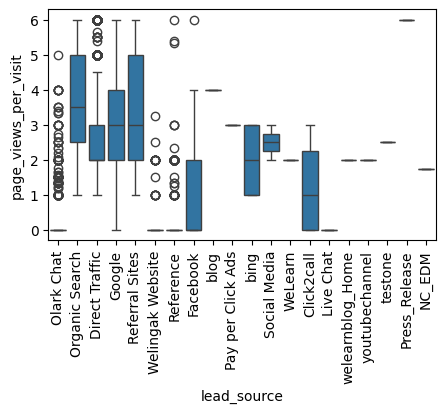

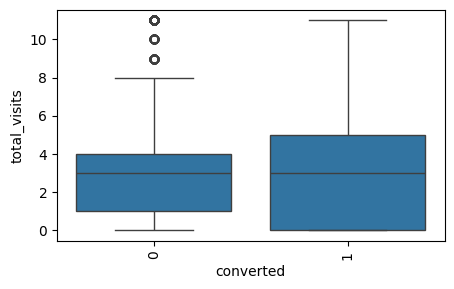

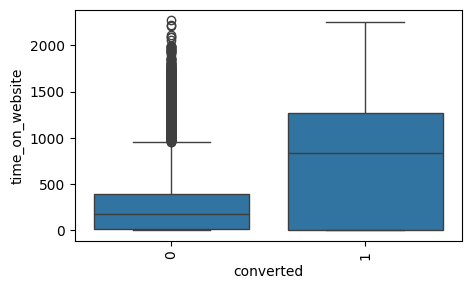

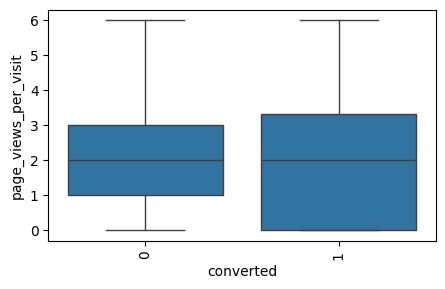

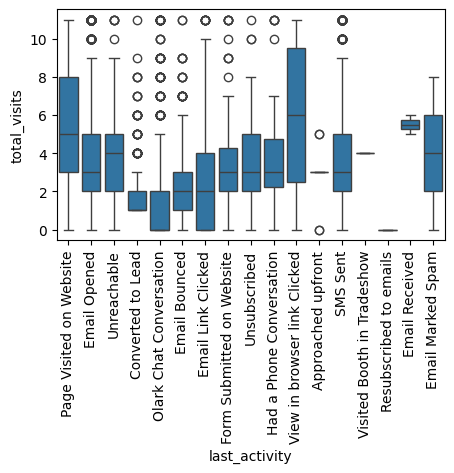

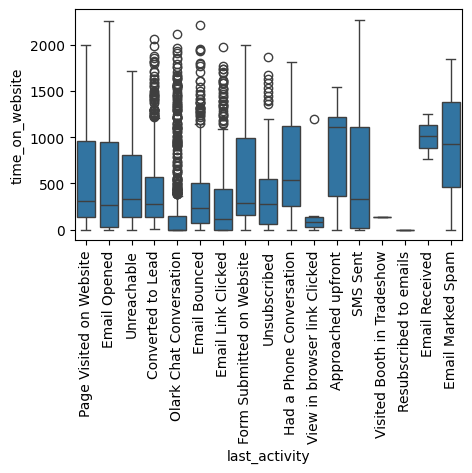

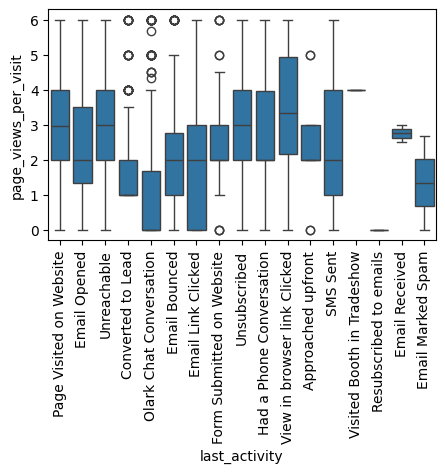

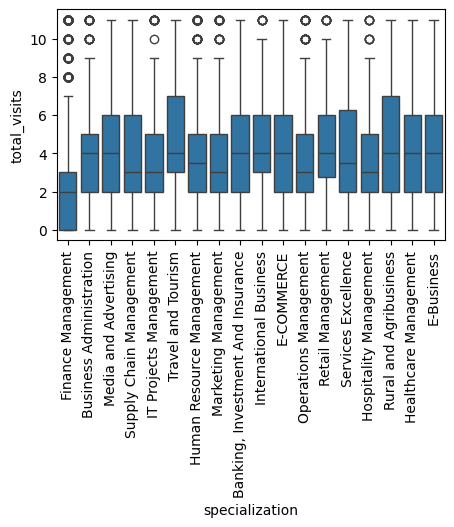

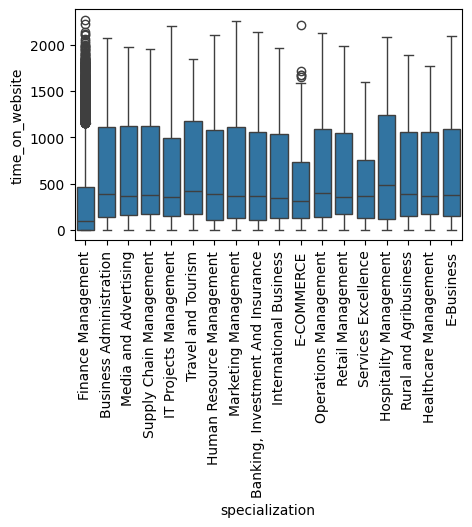

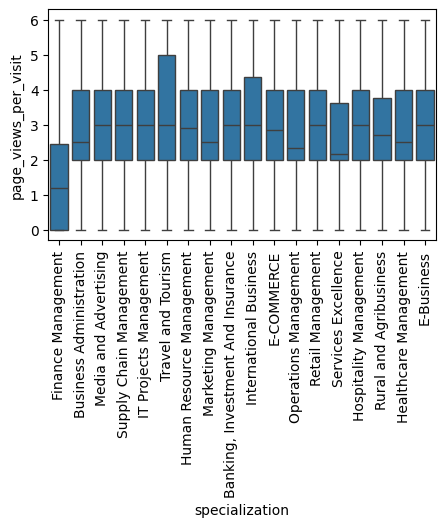

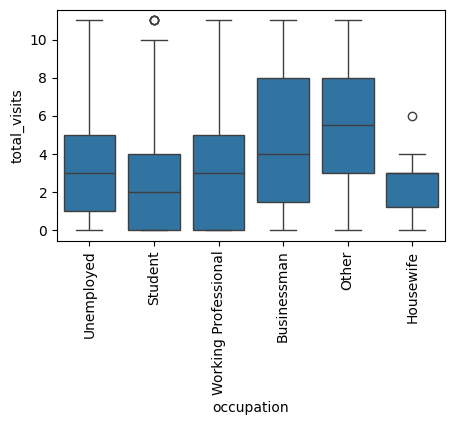

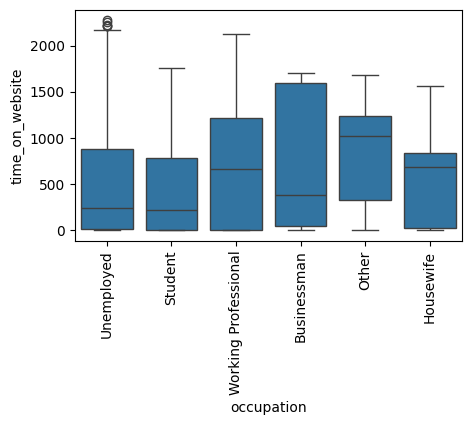

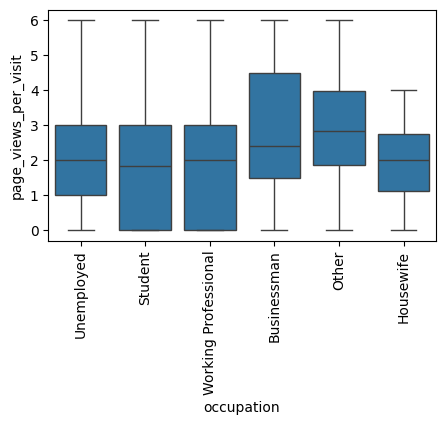

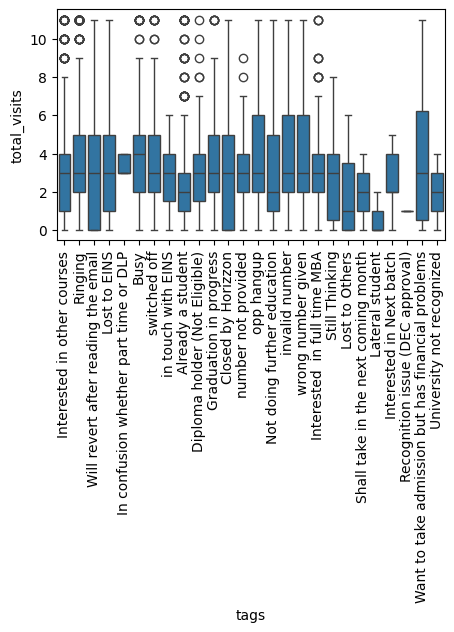

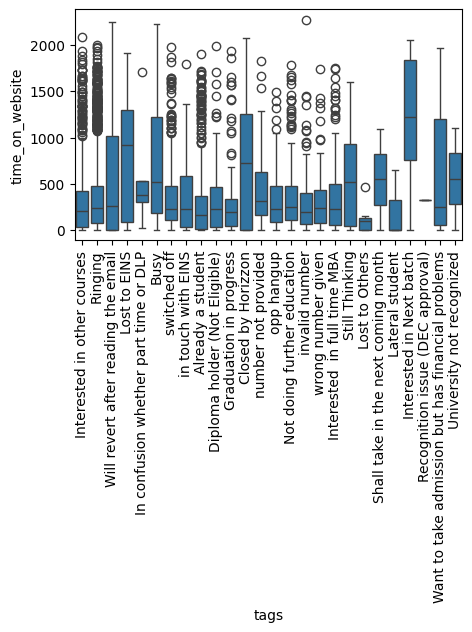

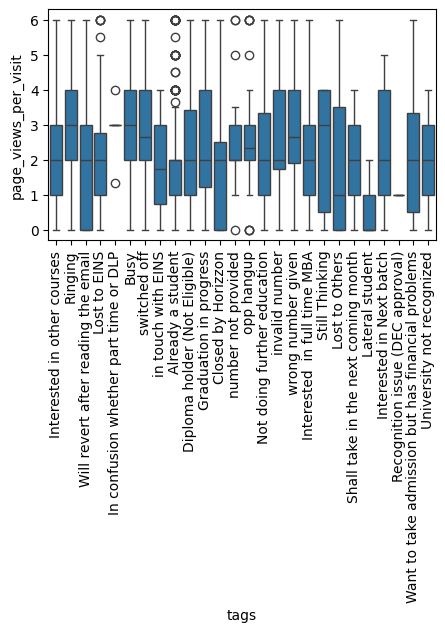

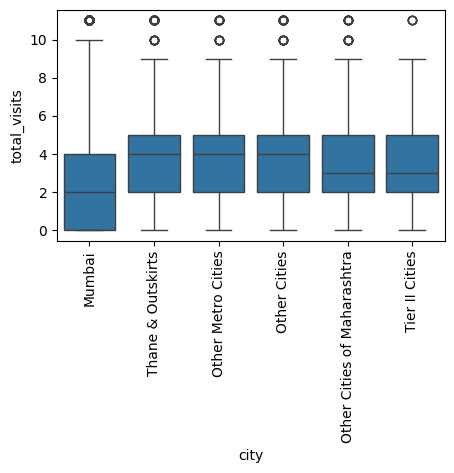

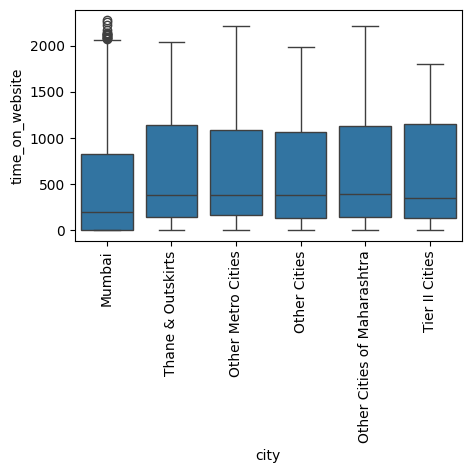

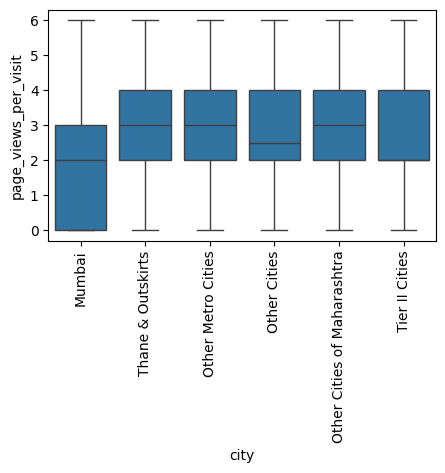

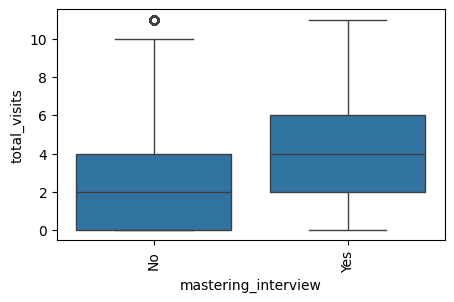

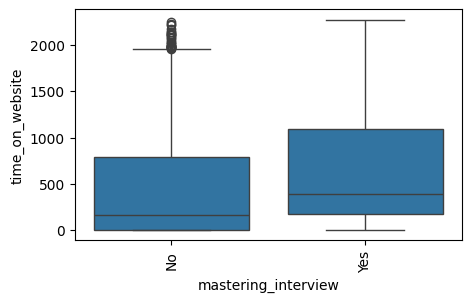

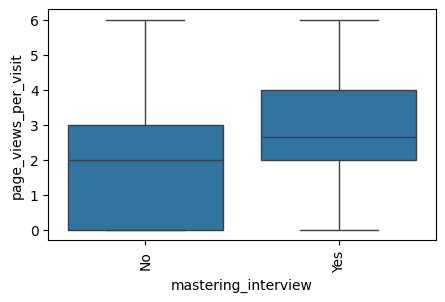

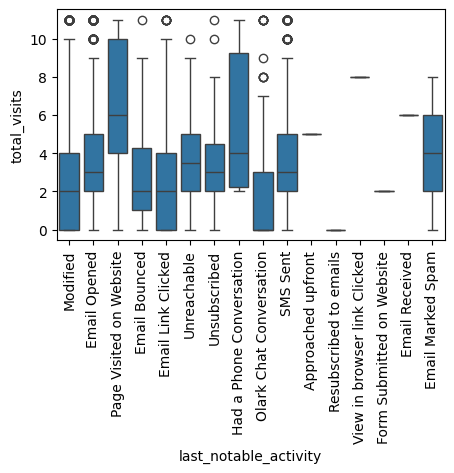

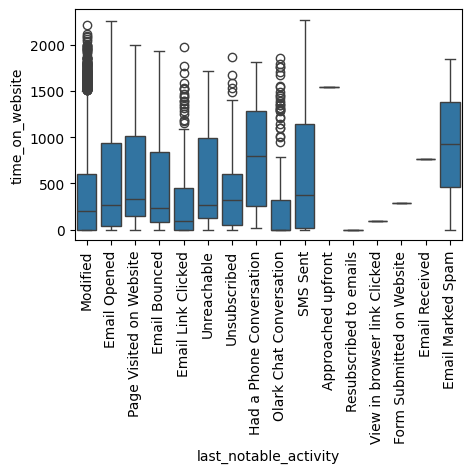

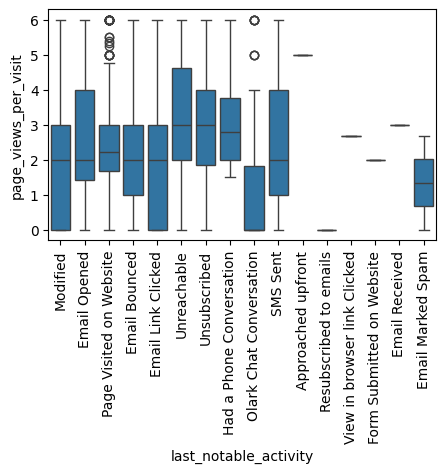

In [49]:
#boxplot for categorical columns
for col1 in cat_cols:
    for col2 in num_cols:
      if col1!=col2:
            plt.figure(figsize=(5,3))
            sns.boxplot(x=lead_df[col1],y=lead_df[col2])
            plt.xticks(rotation =90)
            plt.show()


#### Insights

1. The total time spent by the customer on the website is high for Converted leads than others.
2. Page view per visit is more in converted Leads than others.


### 2C. Multivariate Analysis


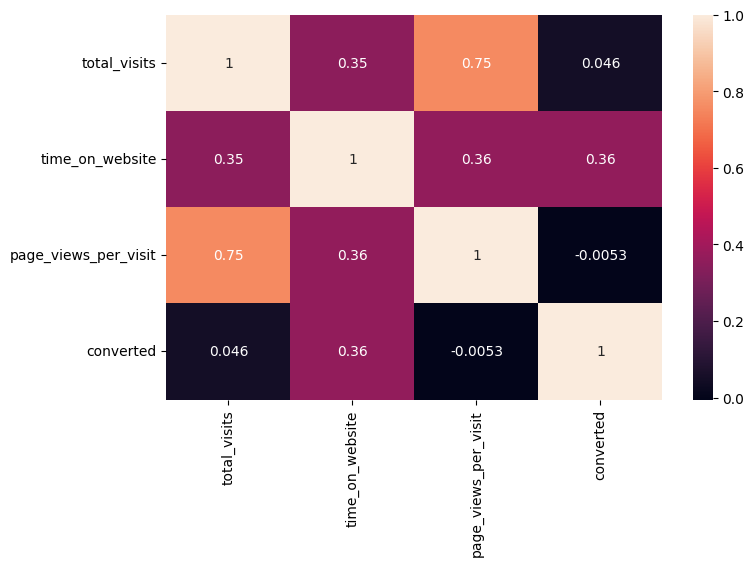

In [50]:
#heatmap for numerical columns
cols = num_cols
cols.append('converted')
plt.figure(figsize=(8,5))
sns.heatmap(lead_df[cols].corr(),annot=True)
plt.show()


#### Insights

1. Total visits and page views per visit are correlated
2. Total visits and page views per visit, both of them are not correlated with Converted column.


## Step 3. Creating Dummy Variables and Binary data for Yes/ No columns


### 3A. Converting Yes/ No into int value 0 and 1


In [51]:
lead_df.columns


Index(['lead_origin', 'lead_source', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity',
       'specialization', 'occupation', 'tags', 'city', 'mastering_interview',
       'last_notable_activity'],
      dtype='object')

In [52]:
def get_yes_no_columns(df):
    """Returns a list of columns where values are strictly 'Yes' and 'No'."""
    yes_no_columns = [
        col for col in df.columns
        if df[col].dropna().isin(['Yes', 'No']).all()
    ]
    return yes_no_columns


In [53]:
yes_no_cols=get_yes_no_columns(lead_df)
print(yes_no_cols)


['mastering_interview']


In [54]:
# List of variables to map

# Defining the map function
def binary_map(lead_df, cols):
    lead_df[cols]=lead_df[cols].replace({'Yes':1, 'No':0})


In [55]:
binary_map(lead_df, yes_no_cols)


In [56]:
yes_no_cols2=get_yes_no_columns(lead_df)
print(yes_no_cols2)


[]


### 3B. Creating 'others' category for categorical variables


Moving all options in Other category when their contribution in attribute is less than 10 % for particular columm to minimize more dummy variable creation. Only columns consider here are the one who has more than 3 unique values.


In [57]:
lead_df.lead_origin.value_counts()


lead_origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [58]:
lead_origin_percentage = lead_df['lead_origin'].value_counts(normalize=True) * 100
print(lead_origin_percentage)


lead_origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64


In [59]:
def get_value_percentages(df, column):
    """
    Returns the percentage distribution of unique values in a given column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column (str): The column name for which to calculate value percentages.

    Returns:
    pd.Series: A Series containing the percentage distribution.
    """

    if column in df.columns:
        return df[column].value_counts(normalize=True) * 100
    else:
        raise ValueError(f"Column '{column}' not found in DataFrame")


In [60]:
li_cols=[]

for col in cat_cols:
    if lead_df[col].nunique()>4:
        percentage =get_value_percentages(lead_df,col)
        li_cols.append(col)
        print(col,"\n", percentage)
        print("*"*50)


lead_origin 
 lead_origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64
**************************************************
lead_source 
 lead_source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64
**************************

In [61]:
li_cols


['lead_origin',
 'lead_source',
 'last_activity',
 'specialization',
 'occupation',
 'tags',
 'city',
 'last_notable_activity']

In [62]:
total_count = len(lead_df)
for col in li_cols:

    # Calculate category frequencies
    category_counts = lead_df[col].value_counts()
    # Calculate category percentages
    category_percent = category_counts / total_count
    # Sort categories by percentage (ascending)
    sorted_categories = category_percent.sort_values()

    # Identify categories to be grouped into "Other"
    other_categories = []
    other_sum = 0

    for category, percent in sorted_categories.items():
        if other_sum + percent < 0.10:  # Ensure "Other" stays below 10%
            other_sum += percent
            other_categories.append(category)
        else:
            break

    # Replace low-frequency categories with "Other"
    lead_df[col] = lead_df[col].apply(lambda x: 'Other' if x in other_categories else x)



In [63]:
lead_df['city'] = np.where(~(lead_df['city'].isin(['Mumbai','Thane & Outskirts'])), "Others", lead_df['city'])


In [64]:
lead_df['city'].value_counts()


city
Mumbai               6891
Others               1597
Thane & Outskirts     752
Name: count, dtype: int64

In [65]:
lead_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_origin            9240 non-null   object 
 1   lead_source            9240 non-null   object 
 2   converted              9240 non-null   int64  
 3   total_visits           9240 non-null   float64
 4   time_on_website        9240 non-null   float64
 5   page_views_per_visit   9240 non-null   float64
 6   last_activity          9240 non-null   object 
 7   specialization         9240 non-null   object 
 8   occupation             9240 non-null   object 
 9   tags                   9240 non-null   object 
 10  city                   9240 non-null   object 
 11  mastering_interview    9240 non-null   int64  
 12  last_notable_activity  9240 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 938.6+ KB


In [66]:
# Define additional columns to exclude
exclude_cols = ['converted', 'total_visits', 'time_on_website', 'page_views_per_visit']

# Combine all exclusion lists
all_col = yes_no_cols + exclude_cols  # Merge lists correctly

# Get the remaining columns (not in all_col)
dummy_cols = lead_df.columns[~lead_df.columns.isin(all_col)]

# Print or use the remaining columns
print(dummy_cols)


Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'occupation', 'tags', 'city', 'last_notable_activity'],
      dtype='object')


### 3C. Creating Dummy variable for categorical columns


In [67]:
dummy_var = pd.get_dummies(lead_df[dummy_cols] , dtype = int, drop_first=True) # Dropping the first dummy variable
lead_df=pd.concat([lead_df,dummy_var], axis=1)
dummy_var.head()


,lead_origin_Landing Page Submission,lead_origin_Other,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other,last_activity_Page Visited on Website,...,tags_Interested in other courses,tags_Other,tags_Ringing,tags_Will revert after reading the email,tags_switched off,city_Others,city_Thane & Outskirts,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
0,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [68]:
lead_df.columns


Index(['lead_origin', 'lead_source', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity',
       'specialization', 'occupation', 'tags', 'city', 'mastering_interview',
       'last_notable_activity', 'lead_origin_Landing Page Submission',
       'lead_origin_Other', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Other',
       'last_activity_Email Opened', 'last_activity_Olark Chat Conversation',
       'last_activity_Other', 'last_activity_Page Visited on Website',
       'last_activity_SMS Sent', 'specialization_Business Administration',
       'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management', 'specialization_Other',
       'specialization_Supply Chain Management',
    

In [69]:
# drop original cols

lead_df.drop(lead_df[dummy_cols],axis=1, inplace=True)


In [70]:
lead_df.columns


Index(['converted', 'total_visits', 'time_on_website', 'page_views_per_visit',
       'mastering_interview', 'lead_origin_Landing Page Submission',
       'lead_origin_Other', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Other',
       'last_activity_Email Opened', 'last_activity_Olark Chat Conversation',
       'last_activity_Other', 'last_activity_Page Visited on Website',
       'last_activity_SMS Sent', 'specialization_Business Administration',
       'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management', 'specialization_Other',
       'specialization_Supply Chain Management',
       'specialization_Travel and Tourism', 'occupation_Unemployed',
       'occupation_Working Professional', 'tags_Busy',
       'tags_C

In [71]:
lead_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   converted                                 9240 non-null   int64  
 1   total_visits                              9240 non-null   float64
 2   time_on_website                           9240 non-null   float64
 3   page_views_per_visit                      9240 non-null   float64
 4   mastering_interview                       9240 non-null   int64  
 5   lead_origin_Landing Page Submission       9240 non-null   int64  
 6   lead_origin_Other                         9240 non-null   int64  
 7   lead_source_Google                        9240 non-null   int64  
 8   lead_source_Olark Chat                    9240 non-null   int64  
 9   lead_source_Organic Search                9240 non-null   int64  
 10  lead_source_Other                   

In [72]:
lead_df.describe()


,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Other,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,...,tags_Interested in other courses,tags_Other,tags_Ringing,tags_Will revert after reading the email,tags_switched off,city_Others,city_Thane & Outskirts,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.217424,487.698268,2.255105,0.312554,0.528788,0.083766,0.314827,0.189935,0.124892,...,0.055519,0.091991,0.130195,0.587121,0.025974,0.172835,0.081385,0.368723,0.090260,0.235065
std,0.486714,2.860471,548.021466,1.779471,0.463559,0.499198,0.277052,0.464472,0.392271,0.330614,...,0.229004,0.289029,0.336536,0.492378,0.159066,0.378125,0.273441,0.482485,0.286569,0.424062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:

# Function for percentage plots
def percent_plot(var):
    values = (lead_df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')


In [74]:
round((sum(lead_df['converted'])/len(lead_df['converted'].index))*100,2)


38.54

38.54% of the 'Converted' data consists of 1s, indicating that 38.54% of the leads have successfully converted. This suggests that we have a sufficient amount of converted lead data for modeling.


## Step 4. Creating the Model


In [75]:
lead_df.head()


,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Other,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,...,tags_Interested in other courses,tags_Other,tags_Ringing,tags_Will revert after reading the email,tags_switched off,city_Others,city_Thane & Outskirts,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
0,0,0.0,0.0,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532.0,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,2.0,1428.0,1.0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [76]:
# Define feature variables (X) and target variable (y)
X = lead_df.drop(columns=['converted'], errors='ignore')
y = lead_df['converted'].copy()


In [77]:
X.head()


,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Other,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other,...,tags_Interested in other courses,tags_Other,tags_Ringing,tags_Will revert after reading the email,tags_switched off,city_Others,city_Thane & Outskirts,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
0,0.0,0.0,0.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,5.0,674.0,2.5,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,305.0,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2.0,1428.0,1.0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [78]:
y.head()


0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y)

# Print dataset shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6468, 39)
(2772, 39)
(6468,)
(2772,)


## Step 5. Feature Scalling


In [80]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['total_visits', 'time_on_website', 'page_views_per_visit']

# Initialize the scaler
scaler = StandardScaler()

# Scale training data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Scale test data using the same scaler (important to prevent data leakage)
X_test[num_cols] = scaler.transform(X_test[num_cols])





In [81]:
# Print first few rows
X_train.head()


,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Other,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other,...,tags_Interested in other courses,tags_Other,tags_Ringing,tags_Will revert after reading the email,tags_switched off,city_Others,city_Thane & Outskirts,last_notable_activity_Modified,last_notable_activity_Other,last_notable_activity_SMS Sent
1755,0.285644,-0.528672,0.982174,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8085,-1.125772,-0.891534,-1.260722,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
426,-0.420064,1.122535,-0.139274,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1214,0.285644,1.639339,0.982174,1,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2714,1.697060,1.828101,2.103622,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Building the Model
Check Feature Importance (Using Recursive Feature Elimination - RFE)


## Step 6. Model Building


#### 6a. Running Your First Training Model


In [82]:
import statsmodels.api as sm


In [83]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1918.8
Date:                Tue, 18 Feb 2025   Deviance:                       3837.6
Time:                        20:48:23   Pearson chi2:                 9.45e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5229
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8852      0.736     -5.279      0.000      -5.328      -2.443
total_visits                                 0.2581      0.065      3.943      0.000       0.130       0.386
time_on_website                              1.1142      0.049     22.530      0.000       1.017       1.211
page_views_per_visit                        -0.2648      0.072     -3.659      0.000      -0.407      -0.123
mastering_interview                         -0.0634      0.130     -0.486      0.627      -0.319       0.192
lead_origin_Landing Page Submission         -0.5345      0.141     -3.787      0.000      -0.811      -0.258
lead_origin_Other                            2.8499      0.343      8.317      0.000       2.178       3.521
lead_source_Google                           0.1241      0.138      0.902      0.367      -0.146       0.394
lead_source_Olark Chat                       0.7251      0.194      3.732      0.000       0.344       1.106
lead_source_Organic Search                   0.2072      0.160      1.292      0.196      -0.107       0.522
lead_source_Other                           -0.1055      0.312     -0.338      0.735      -0.716       0.505
last_activity_Email Opened                   0.6485      0.274      2.369      0.018       0.112       1.185
last_activity_Olark Chat Conversation       -0.9599      0.302     -3.182      0.001      -1.551      -0.369
last_activity_Other                         -0.0028      0.274     -0.010      0.992      -0.540       0.535
last_activity_Page Visited on Website       -0.1835      0.299     -0.613      0.540      -0.770       0.403
last_activity_SMS Sent                       0.8836      0.269      3.290      0.001       0.357       1.410
specialization_Business Administration      -0.0134      0.298     -0.045      0.964      -0.598       0.572
specialization_Finance Management           -0.7275      0.246     -2.958      0.003      -1.210      -0.245
specialization_Human Resource Management    -0.1149      0.266     -0.432      0.666      -0.636       0.407
specialization_IT Projects Management       -0.2732      0.314     -0.871      0.384      -0.888       0.342
specialization_Marketing Management          0.0489      0.265      0.184      0.854      -0.471       0.569
specialization_Media and Advertising        -0.6104      0.360     -1.696      0.090      -1.316       0.095
specialization_Operations Management        -0.1144      0.293     -0.391      0.696      -0.688       0.459
specialization_Other                        -0.5220      0.267     -1.955      0.051      -1.045       0.001
specialization_Supply Chain Management      -0.1930      0.309     -0.625      0.532      -0.798       0.412
specialization_Travel and Touri

#### 6b. Feature Selection Using RFE


In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression()


In [85]:
# Perform RFE to select top features
rfe = RFE(model, n_features_to_select=15)
rfe.fit(X_train, y_train)



RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [86]:
# Get the correct selected features without modifying X_train
rfe_selected_features = X_train.columns[rfe.support_].tolist()
print("Selected Features by RFE:", rfe_selected_features)


Selected Features by RFE: ['time_on_website', 'lead_origin_Other', 'last_activity_Email Opened', 'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent', 'occupation_Unemployed', 'occupation_Working Professional', 'tags_Busy', 'tags_Closed by Horizzon', 'tags_Interested in other courses', 'tags_Other', 'tags_Ringing', 'tags_Will revert after reading the email', 'tags_switched off', 'last_notable_activity_SMS Sent']


In [87]:
X_train_rfe = X_train[rfe_selected_features].copy()
X_test_rfe = X_test[rfe_selected_features].copy()


In [88]:
# Check shapes
print("Original X_train shape:", X_train.shape)
print("Filtered X_train_rfe shape:", X_train_rfe.shape)
print("Filtered X_test_rfe shape:", X_test_rfe.shape)


Original X_train shape: (6468, 39)
Filtered X_train_rfe shape: (6468, 15)
Filtered X_test_rfe shape: (2772, 15)


In [89]:
# To check output of RFE
rfe.support_


array([False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True])

Get Lists of Selected & Not Selected Features with Their Ranks


In [90]:
# Create lists for selected and not selected features
selected_features = []
not_selected_features = []

# Iterate through RFE results
for feature, selected, rank in zip(X_train.columns, rfe.support_, rfe.ranking_):
    if selected:
        selected_features.append((feature, rank))  # Store (feature, rank) for selected
    else:
        not_selected_features.append((feature, rank))  # Store (feature, rank) for not selected

# Sort lists by rank (descending order)
selected_features_sorted = sorted(selected_features, key=lambda x: x[1], reverse=True)
not_selected_features_sorted = sorted(not_selected_features, key=lambda x: x[1], reverse=True)

# Print selected features
print("\nSelected Features (with Rank 1):")
for feature, rank in selected_features_sorted:
    print(f"Feature: {feature}, Rank: {rank}")

# Print not selected features
print("\nNot Selected Features (Higher Rank means less important):")
for feature, rank in not_selected_features_sorted:
    print(f"Feature: {feature}, Rank: {rank}")



Selected Features (with Rank 1):
Feature: time_on_website, Rank: 1
Feature: lead_origin_Other, Rank: 1
Feature: last_activity_Email Opened, Rank: 1
Feature: last_activity_Olark Chat Conversation, Rank: 1
Feature: last_activity_SMS Sent, Rank: 1
Feature: occupation_Unemployed, Rank: 1
Feature: occupation_Working Professional, Rank: 1
Feature: tags_Busy, Rank: 1
Feature: tags_Closed by Horizzon, Rank: 1
Feature: tags_Interested in other courses, Rank: 1
Feature: tags_Other, Rank: 1
Feature: tags_Ringing, Rank: 1
Feature: tags_Will revert after reading the email, Rank: 1
Feature: tags_switched off, Rank: 1
Feature: last_notable_activity_SMS Sent, Rank: 1

Not Selected Features (Higher Rank means less important):
Feature: last_activity_Other, Rank: 25
Feature: specialization_Human Resource Management, Rank: 24
Feature: specialization_Operations Management, Rank: 23
Feature: last_notable_activity_Other, Rank: 22
Feature: specialization_Supply Chain Management, Rank: 21
Feature: mastering_i

In [91]:
# Features selected
col = X_train.columns[rfe.support_]
col


Index(['time_on_website', 'lead_origin_Other', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent',
       'occupation_Unemployed', 'occupation_Working Professional', 'tags_Busy',
       'tags_Closed by Horizzon', 'tags_Interested in other courses',
       'tags_Other', 'tags_Ringing',
       'tags_Will revert after reading the email', 'tags_switched off',
       'last_notable_activity_SMS Sent'],
      dtype='object')

In [92]:
# Features eliminated
X_train.columns[~rfe.support_]


Index(['total_visits', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Other', 'last_activity_Other',
       'last_activity_Page Visited on Website',
       'specialization_Business Administration',
       'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management', 'specialization_Other',
       'specialization_Supply Chain Management',
       'specialization_Travel and Tourism', 'city_Others',
       'city_Thane & Outskirts', 'last_notable_activity_Modified',
       'last_notable_activity_Other'],
      dtype='object')

In [93]:
X_train_rfe.head()


,time_on_website,lead_origin_Other,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Other,tags_Ringing,tags_Will revert after reading the email,tags_switched off,last_notable_activity_SMS Sent
1755,-0.528672,0,1,0,0,1,0,0,0,0,0,0,1,0,0
8085,-0.891534,1,0,0,1,1,0,0,0,0,0,0,1,0,0
426,1.122535,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1214,1.639339,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2714,1.828101,0,0,0,1,1,0,0,0,0,0,0,1,0,1


In [94]:
import statsmodels.api as sm

def build_logistic_model(X, y):
    """
    Builds and fits a logistic regression model using StatsModels.

    Parameters:
    X (DataFrame): Feature dataset.
    y (Series): Target variable.

    Returns:
    model (GLMResults): Fitted logistic regression model.
    X_sm (DataFrame): Feature dataset with constant added.
    """

    if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.Series):
        raise ValueError("X must be a DataFrame and y must be a Series.")

    # Add constant for intercept
    X_sm = sm.add_constant(X, has_constant='add')  # Ensures constant is added only if missing

    # Fit the logistic model
    model = sm.GLM(y, X_sm, family=sm.families.Binomial()).fit()


    print("\n Logistic Regression Model Summary:\n")
    print(model.summary())

    return model, X_sm  # Returning model first


In [95]:

model1, X_train_sm = build_logistic_model(X_train_rfe, y_train)



 Logistic Regression Model Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.2
Date:                Tue, 18 Feb 2025   Deviance:                       3994.4
Time:                        20:48:23   Pearson chi2:                 8.76e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5112
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

#### 6c. Removed tags_Ringing from model because of High P value


Tags_Ringing is having highest P Value. So eliminating that from model building


In [96]:
col2 = col.drop('tags_Ringing',1)
# To rebuild the model
model2, X_train_sm2 = build_logistic_model(X_train_rfe[col2],y_train)



 Logistic Regression Model Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.2
Date:                Tue, 18 Feb 2025   Deviance:                       3994.4
Time:                        20:48:23   Pearson chi2:                 8.75e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5112
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

#### 6d. Removed tags_Interested in other courses from model because of High P value


In [97]:
col3 = col2.drop('tags_Interested in other courses',1)

# To rebuild the model
model3, X_train_sm3 = build_logistic_model(X_train_rfe[col3],y_train)



 Logistic Regression Model Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.6
Date:                Tue, 18 Feb 2025   Deviance:                       3995.2
Time:                        20:48:23   Pearson chi2:                 8.88e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

#### 6e. Removed tags_switched off from model because of High P value


In [98]:
col4 = col3.drop('tags_switched off',1)

# To rebuild the model
model4, X_train_sm4 = build_logistic_model(X_train_rfe[col4],y_train)



 Logistic Regression Model Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.7
Date:                Tue, 18 Feb 2025   Deviance:                       3997.5
Time:                        20:48:23   Pearson chi2:                 9.14e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5109
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [99]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(X):
    """
    Calculates the Variance Inflation Factor (VIF) for a given DataFrame.

    Parameters:
    X (pd.DataFrame): DataFrame containing numerical features.

    Returns:
    pd.DataFrame: DataFrame with features and their corresponding VIF values.
    """
    # Drop 'const' column if present
    X = X.drop(columns=['const'], errors='ignore')

    # Create a VIF DataFrame
    vif_data = pd.DataFrame()
    vif_data['Features'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.shape[1])]

    # Round values for better readability
    vif_data['VIF'] = vif_data['VIF'].round(2)

    # Sort by VIF values in descending order
    return vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)



In [100]:
# We also need to analyze the Variance Inflation Factors (VIFs) for the features to identify and address any potential multicollinearity in the dataset.

vif_result = check_vif(X_train_sm4)  # Pass the training dataset, not the model

# Print VIF results
print("Variance Inflation Factor (VIF) Analysis:\n", vif_result)



Variance Inflation Factor (VIF) Analysis:
                                     Features   VIF
0                     last_activity_SMS Sent  6.11
1                      occupation_Unemployed  5.87
2             last_notable_activity_SMS Sent  4.86
3   tags_Will revert after reading the email  3.36
4                 last_activity_Email Opened  2.57
5            occupation_Working Professional  1.69
6      last_activity_Olark Chat Conversation  1.47
7                    tags_Closed by Horizzon  1.40
8                          lead_origin_Other  1.39
9                                 tags_Other  1.35
10                           time_on_website  1.13
11                                 tags_Busy  1.09


#### 6f. Removed last_activity_SMS Sent from model because of High VIF


In [101]:
col5 = col4.drop('last_activity_SMS Sent',1)

# To rebuild the model
model5, X_train_sm5 = build_logistic_model(X_train_rfe[col5],y_train)



 Logistic Regression Model Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2006.0
Date:                Tue, 18 Feb 2025   Deviance:                       4012.0
Time:                        20:48:23   Pearson chi2:                 9.06e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5099
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [102]:
# We also need to analyze the Variance Inflation Factors (VIFs) for the features to identify and address any potential multicollinearity in the dataset.

vif_result = check_vif(X_train_sm5)  # Pass the training dataset, not the model

# Print VIF results
print("Variance Inflation Factor (VIF) Analysis:\n", vif_result)



Variance Inflation Factor (VIF) Analysis:
                                     Features   VIF
0                      occupation_Unemployed  5.28
1   tags_Will revert after reading the email  3.34
2                 last_activity_Email Opened  2.23
3             last_notable_activity_SMS Sent  1.91
4            occupation_Working Professional  1.64
5                    tags_Closed by Horizzon  1.40
6                          lead_origin_Other  1.38
7      last_activity_Olark Chat Conversation  1.38
8                                 tags_Other  1.35
9                            time_on_website  1.13
10                                 tags_Busy  1.09


#### 6g. Removed occupation_Unemployed from model because of High VIF


In [103]:
col6 = col5.drop('occupation_Unemployed',1)

# To rebuild the model
model6, X_train_sm6 = build_logistic_model(X_train_rfe[col6],y_train)



 Logistic Regression Model Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.6
Date:                Tue, 18 Feb 2025   Deviance:                       4023.3
Time:                        20:48:23   Pearson chi2:                 9.03e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5090
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [104]:
# We also need to analyze the Variance Inflation Factors (VIFs) for the features to identify and address any potential multicollinearity in the dataset.

vif_result = check_vif(X_train_sm6)  # Pass the training dataset, not the model

# Print VIF results
print("Variance Inflation Factor (VIF) Analysis:\n", vif_result)


Variance Inflation Factor (VIF) Analysis:
                                    Features   VIF
0  tags_Will revert after reading the email  2.14
1                last_activity_Email Opened  1.59
2            last_notable_activity_SMS Sent  1.52
3                         lead_origin_Other  1.38
4                   tags_Closed by Horizzon  1.30
5     last_activity_Olark Chat Conversation  1.23
6           occupation_Working Professional  1.19
7                           time_on_website  1.12
8                                tags_Other  1.09
9                                 tags_Busy  1.04


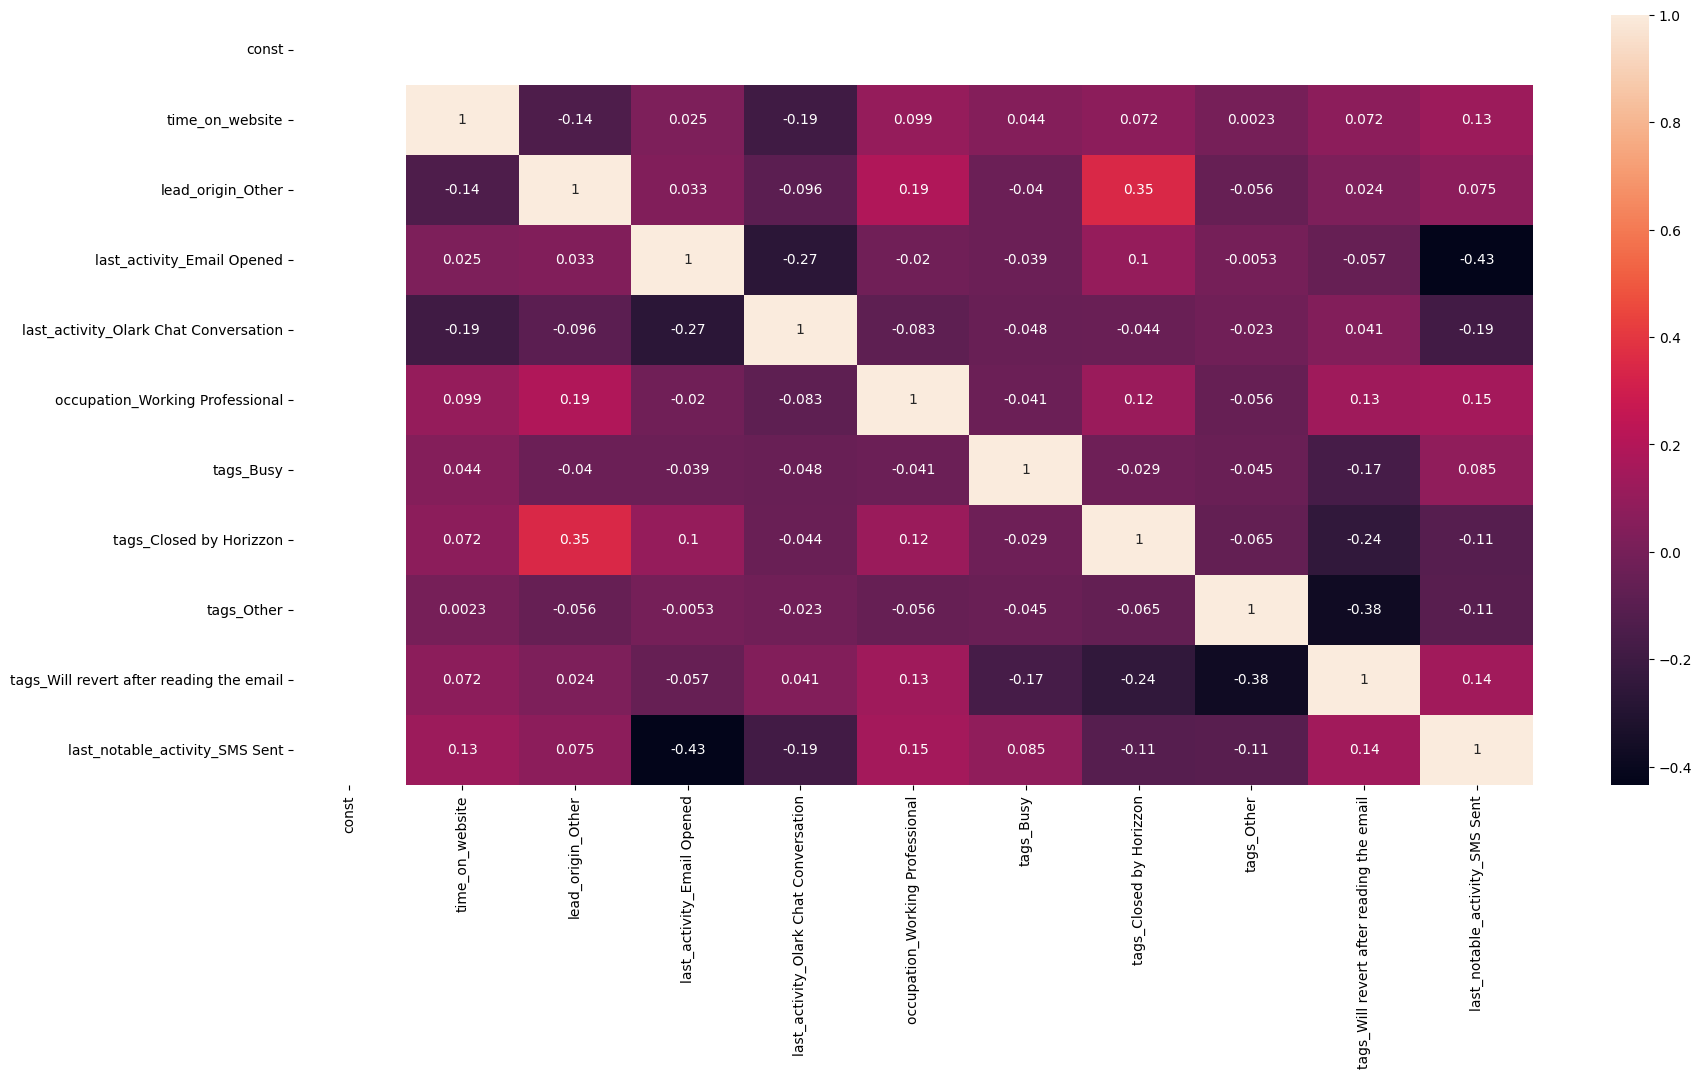

In [105]:
# To plot correlations
plt.figure(figsize = (20,10))
sns.heatmap(X_train_sm6.corr(),annot = True)
plt.show()


In [106]:
import pandas as pd

def get_pred(X, model, y):
    """
    Generates predicted probabilities and classifications, storing them in a DataFrame.

    Parameters:
    X (DataFrame): Feature dataset used for predictions.
    model (GLMResults): The trained logistic regression model.
    y (Series): Actual target values.

    Returns:
    DataFrame: A DataFrame containing actual labels, predicted probabilities, and binary predictions.
    """
    # Ensure model is trained and has a predict method
    if not hasattr(model, "predict"):
        raise ValueError("🚨 Error: The provided model does not have a `.predict()` method. Ensure it is trained.")

    # Get predicted probabilities
    y_pred_prob = model.predict(X)

    # Create DataFrame to store results
    y_pred_final = pd.DataFrame({
        'Lead ID': X.index,         # Retain original index as Lead ID
        'Converted': y.values,      # Actual target values
        'Converted_prob': y_pred_prob,  # Predicted probabilities
        'predicted': (y_pred_prob >= 0.5).astype(int)  # Apply threshold (default 0.5)
    })

    return y_pred_final


In [107]:
# Get predictions for the training set
y_train_pred_final = get_pred(X_train_sm6, model6, y_train)

# Display first few rows of predictions
print(y_train_pred_final.head())


      Lead ID  Converted  Converted_prob  predicted
1755     1755          0        0.284793          0
8085     8085          1        0.683270          1
426       426          1        0.482104          0
1214     1214          1        0.979216          1
2714     2714          1        0.968426          1


## Step 7. Metrics beyond simply accuracy


In [108]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_confusion_matrix(y_true, y_pred):
    """
    Computes and returns the confusion matrix along with accuracy, precision, recall, and F1-score.

    Parameters:
    y_true (array-like): Actual target labels.
    y_pred (array-like): Predicted target labels.

    Returns:
    pd.DataFrame: Confusion matrix in a tabular format.
    pd.DataFrame: Model evaluation metrics (Accuracy, Precision, Recall, F1 Score).
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute performance metrics
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

    # Convert confusion matrix to DataFrame
    cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

    # Convert metrics dictionary to DataFrame
    metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])

    return cm_df, metrics_df


In [109]:
# Evaluate confusion matrix for training set

cm_df,metrics_df = evaluate_confusion_matrix(y_train, y_train_pred_final["predicted"])


In [110]:
cm_df


,Predicted 0,Predicted 1
Actual 0,3636,339
Actual 1,483,2010


In [111]:
metrics_df


,Metric,Value
0,Accuracy,0.872913
1,Precision,0.855683
2,Recall,0.806258
3,F1 Score,0.830235


**Interpretation**

- Accuracy (87.29%): The model is correct 87.29% of the time.
- Precision (85.56%): 85.56% of predicted positives were actual positives.
- Recall (80.63%): The model correctly identified 80.63% of actual positives.
- F1 Score (83.02%): A balanced measure of precision and recall.


In [112]:
def other_metrics(confusion):
    """
    Computes Sensitivity, Specificity, False Positive Rate, Positive Predictive Value, and Negative Predictive Value.

    Parameters:
    confusion (numpy.ndarray): The confusion matrix.

    Prints:
    Sensitivity, Specificity, FPR, Precision, and NPV.
    """
    TP = confusion[1,1]    # True positives
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives

    sensitivity = TP / float(TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / float(TN + FP) if (TN + FP) != 0 else 0
    false_positive_rate = FP / float(TN + FP) if (TN + FP) != 0 else 0
    positive_predictive_value = TP / float(TP + FP) if (TP + FP) != 0 else 0
    negative_predictive_value = TN / float(TN + FN) if (TN + FN) != 0 else 0

    # Print results
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"False Positive Rate: {false_positive_rate:.4f}")
    print(f"Positive Predictive Value: {positive_predictive_value:.4f}")
    print(f"Negative Predictive Value: {negative_predictive_value:.4f}")


In [113]:
# Compute advanced metrics based on confusion matrix
other_metrics(cm_df.values)


Sensitivity: 0.8063
Specificity: 0.9147
False Positive Rate: 0.0853
Positive Predictive Value: 0.8557
Negative Predictive Value: 0.8827


## Step 8. Plotting the ROC Curve


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [114]:
## Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [115]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


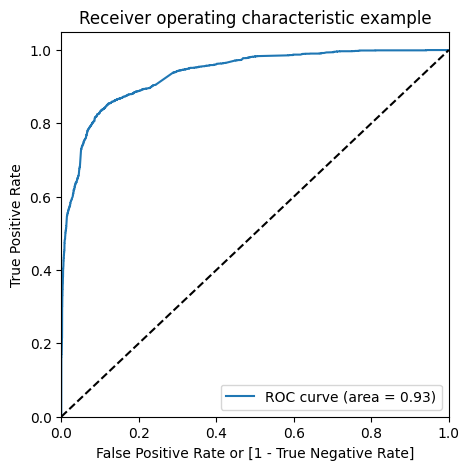

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


## Step 9. Finding Optimal Cutoff Point


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [117]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1755,1755,0,0.284793,0,1,1,1,0,0,0,0,0,0,0
8085,8085,1,0.683270,1,1,1,1,1,1,1,1,0,0,0
426,426,1,0.482104,0,1,1,1,1,1,0,0,0,0,0
1214,1214,1,0.979216,1,1,1,1,1,1,1,1,1,1,1
2714,2714,1,0.968426,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.385436  1.000000  0.000000
0.1   0.1  0.710266  0.972323  0.545912
0.2   0.2  0.794836  0.942238  0.702390
0.3   0.3  0.850340  0.873245  0.835975
0.4   0.4  0.871367  0.839150  0.891572
0.5   0.5  0.872913  0.806258  0.914717
0.6   0.6  0.871831  0.773365  0.933585
0.7   0.7  0.839208  0.649418  0.958239
0.8   0.8  0.820656  0.565183  0.980881
0.9   0.9  0.788961  0.465704  0.991698


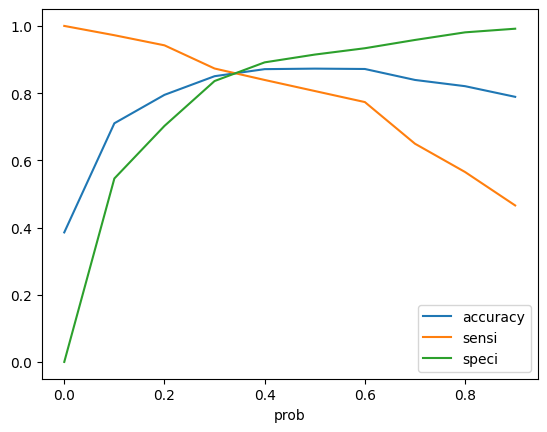

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


**From the curve above, 0.3 is the optimum point to take it as a cutoff probability.**


In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()


,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1755,1755,0,0.284793,0,1,1,1,0,0,0,0,0,0,0,0
8085,8085,1,0.683270,1,1,1,1,1,1,1,1,0,0,0,1
426,426,1,0.482104,0,1,1,1,1,1,0,0,0,0,0,1
1214,1214,1,0.979216,1,1,1,1,1,1,1,1,1,1,1,1
2714,2714,1,0.968426,1,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8503401360544217

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3323,  652],
       [ 316, 2177]])

In [123]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [124]:
cm_df1,metrics_df1 = evaluate_confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )


In [125]:
# Compute advanced metrics based on confusion matrix
other_metrics(cm_df1.values)



Sensitivity: 0.8732
Specificity: 0.8360
False Positive Rate: 0.1640
Positive Predictive Value: 0.7695
Negative Predictive Value: 0.9132


In [126]:
metrics_df1


,Metric,Value
0,Accuracy,0.850340
1,Precision,0.769530
2,Recall,0.873245
3,F1 Score,0.818113


In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted ,y_train_pred_final.Converted_prob)


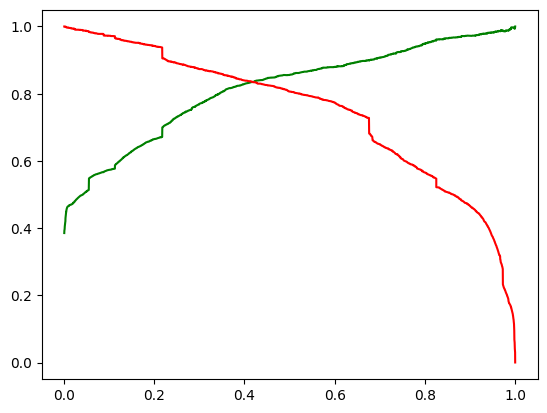

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


## Step 10. Making predictions on the test set


In [129]:
X_test = X_test[col6]
X_test.head()


,time_on_website,lead_origin_Other,last_activity_Email Opened,last_activity_Olark Chat Conversation,occupation_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Other,tags_Will revert after reading the email,last_notable_activity_SMS Sent
8305,-0.891534,0,1,0,0,0,0,0,1,0
1591,1.067556,0,1,0,0,0,0,0,1,0
8604,-0.589149,0,0,0,0,0,0,0,0,1
1333,-0.028362,0,0,0,0,0,0,0,1,0
4260,-0.887869,0,0,0,0,0,0,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)


In [131]:
X_test_sm.shape


(2772, 11)

In [132]:
y_test_pred = model6.predict(X_test_sm)


In [133]:
y_test_pred


8305    0.217642
1591    0.658563
8604    0.030501
1333    0.229850
4260    0.001425
          ...   
482     0.998926
310     0.288125
8066    0.037891
8581    0.825159
3095    0.998945
Length: 2772, dtype: float64

## Step 11. Test Data accuracy Metrics


In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [136]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index


In [137]:
y_test_df.head()


,converted,Lead Number
8305,0,8305
1591,1,1591
8604,0,8604
1333,0,1333
4260,0,4260


In [138]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [140]:
y_pred_final.head()


,converted,Lead Number,0
0,0,8305,0.217642
1,1,1591,0.658563
2,0,8604,0.030501
3,0,1333,0.229850
4,0,4260,0.001425


In [141]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})


In [142]:
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()


,converted,Lead Number,Conversion_Prob,Lead_Score
0,0,8305,0.217642,21.764180
1,1,1591,0.658563,65.856343
2,0,8604,0.030501,3.050108
3,0,1333,0.229850,22.984995
4,0,4260,0.001425,0.142545


In [143]:
y_pred_final = y_pred_final[['Lead Number', 'converted', 'Conversion_Prob', 'Lead_Score']]


In [144]:
y_pred_final.head()


,Lead Number,converted,Conversion_Prob,Lead_Score
0,8305,0,0.217642,21.764180
1,1591,1,0.658563,65.856343
2,8604,0,0.030501,3.050108
3,1333,0,0.229850,22.984995
4,4260,0,0.001425,0.142545


Setting the same cutoff 0.3 using which the model on train was created.


In [145]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 30.0 else 0)


In [146]:
y_pred_final.head()


,Lead Number,converted,Conversion_Prob,Lead_Score,final_predicted
0,8305,0,0.217642,21.764180,0
1,1591,1,0.658563,65.856343,1
2,8604,0,0.030501,3.050108,0
3,1333,0,0.229850,22.984995,0
4,4260,0,0.001425,0.142545,0


Calculating the overall accuracy of the model


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)


0.851010101010101

The final overall accuracy of the test dats is 85.1% which is almost same with the train model accuracy.


Creating the confusion matrix with the test data


In [148]:
confusion = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion


array([[1437,  267],
       [ 146,  922]])

In [149]:
cm_df2,metrics_df2 = evaluate_confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )


In [150]:
# Compute advanced metrics based on confusion matrix
other_metrics(cm_df2.values)


Sensitivity: 0.8633
Specificity: 0.8433
False Positive Rate: 0.1567
Positive Predictive Value: 0.7754
Negative Predictive Value: 0.9078


In [151]:
metrics_df2


,Metric,Value
0,Accuracy,0.851010
1,Precision,0.775442
2,Recall,0.863296
3,F1 Score,0.817014


We see that the final sensitivity of the model for test data is 86.33% which is very good.


## Step 12. FInal Model and Findings


In [152]:
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.6
Date:                Tue, 18 Feb 2025   Deviance:                       4023.3
Time:                        20:48:24   Pearson chi2:                 9.03e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5090
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.6743      0.207    -27.417      0.000      -6.080      -5.269
time_on_website                              0.9884      0.042     23.268      0.000       0.905       1.072
lead_origin_Other                            2.8312      0.189     14.999      0.000       2.461       3.201
last_activity_Email Opened                   0.7829      0.095      8.230      0.000       0.596       0.969
last_activity_Olark Chat Conversation       -0.7823      0.190     -4.123      0.000      -1.154      -0.410
occupation_Working Professional              2.6305      0.229     11.466      0.000       2.181       3.080
tags_Busy                                    4.0232      0.286     14.089      0.000       3.464       4.583
tags_Closed by Horizzon                      9.7764      1.031      9.478      0.000       7.755      11.798
tags_Other                                   3.4316      0.220     15.610      0.000       3.001       3.862
tags_Will revert after reading the email     4.4932      0.192     23.360      0.000       4.116       4.870
last_notable_activity_SMS Sent               2.7976      0.122     23.001      0.000       2.559       3.036
============================================================================================================
"""

**Hence, the final model is as below:**

```
 Converted = - 5.6743 + 0.9884 * Total Time Spent on Website + 2.83 * lead_origin_Other + 0.7829 * last_activity_Email Opened - 0.7823 * last_activity_Olark Chat Conversation + 2.6305 * occupation_Working Professional + 4.0232 * tags_Busy  + 9.7764 *tags_Closed by Horizzon + 3.4316 * tags_Other +  4.4932 * tags_Will_revert after reading the email + 2.7976 * last_notable_activity_SMS Sent
```


**Findings**

1. Tags_Closed By Horizzon highly contributing to Model with positive Correlation.
2. tags_Will_revert after reading the email is 2nd highest contributing feature with positive correlation.
3. tags_Busy is third highest contributing feature with postive correlation.
4. Finding from Coefficient of model shows that Tags is the important attribute and that can easily identify which leads has high probability to convert into Customer.
